<a href="https://colab.research.google.com/github/JacekPardyak/vps/blob/master/VPS_H2O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install h2o
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,15 mins 59 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.7
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_kzg8af
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.135 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
!wget --continue https://raw.githubusercontent.com/JacekPardyak/vps/master/Mastering%20Machine%20Learning%20with%20Spark%203.x/HIGGS_100000.csv -O /tmp/HIGGS_100000.csv
df = h2o.import_file(path="/tmp/HIGGS_100000.csv")
df.describe()


--2021-09-14 08:29:38--  https://raw.githubusercontent.com/JacekPardyak/vps/master/Mastering%20Machine%20Learning%20with%20Spark%203.x/HIGGS_100000.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73050352 (70M) [text/plain]
Saving to: ‘/tmp/HIGGS_100000.csv’

/tmp/HIGGS_100000.c 100%[===================>]  69.67M   186MB/s    in 0.4s    

2021-09-14 08:29:39 (186 MB/s) - ‘/tmp/HIGGS_100000.csv’ saved [73050352/73050352]

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:100000
Cols:29




,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,0.0,0.2746966481208801,-2.434002161026001,-1.7425082921981812,0.002210162812843919,-1.7439157962799072,0.14812886714935303,-2.9687347412109375,-1.7412374019622803,0.0,0.18935886025428772,-2.9130895137786865,-1.7423716783523557,0.0,0.26360762119293213,-2.7296628952026367,-1.7420687675476072,0.0,0.36535415053367615,-2.497264862060547,-1.7426908016204834,0.0,0.11087537556886673,0.30763885378837585,0.22788041830062866,0.27290311455726624,0.07569049298763275,0.3679291605949402,0.40018609166145325
mean,0.52866,0.993621352521182,0.0002880734955884015,-0.0004234362078977645,0.9965381261057293,0.0026323656267650763,0.9920265955953292,-0.004321102674101128,-0.00425373430796182,1.0025269523334515,0.9928988267506644,-0.0005490872870284458,0.0016040527313569333,1.0032706250166885,0.9936001904276007,0.003185142059224611,0.0025480556219571833,1.00349078807831,0.9832383864331226,-0.0018045427140782589,-0.00311826042394561,0.9866098347043982,1.033252245353536,1.0252629844608903,1.051249602322579,1.0086338027065989,0.9766001512911913,1.0334285469365125,0.9598198570868387
maxs,1.0,8.730631828308105,2.4348678588867188,1.7432359457015991,8.147040367126465,1.7432570457458496,6.4829511642456055,2.9696741104125977,1.741453766822815,2.1730761528015137,7.896918773651123,2.9132099151611333,1.7431747913360596,2.214872121810913,7.687297344207764,2.730008840560913,1.7428839206695557,2.548224449157715,6.143596172332765,2.498008966445923,1.7433723211288452,3.101961374282837,18.98233413696289,10.145569801330566,4.7419753074646,9.819252014160156,10.19253921508789,7.6169371604919425,6.259155750274658
sigma,0.4991804245069733,0.566689312817671,1.0090751181391613,1.0068551940826977,0.595681392945781,1.0055122999833195,0.474316802240181,1.0079704609606412,1.0078181857966007,1.0276436475574287,0.4983615575060766,1.00980407090941,1.0053495613008785,1.0494507829740631,0.49293248095713027,1.0058943918978673,1.0087137983885441,1.1953149152060851,0.5039994853206154,1.0111100387175376,1.006344045803474,1.39357096560838,0.6719401533475269,0.37877924757140335,0.16507998464423315,0.3926972443307142,0.525434982779072,0.36506843833998753,0.3120465612270072
zeros,47134,0,0,0,0,0,0,0,0,48891,0,0,0,50046,0,0,0,56882,0,0,0,65180,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,1.2581875324249268,-0.2289368063211441,0.638507068157196,0.886296808719635,1.521682143211365,0.749988317489624,0.27822914719581604,-1.0521488189697266,1.0865380764007568,0.6475216746330261,0.16130828857421875,0.04428587481379509,0.0,1.0384490489959717,-1.128535509109497,-0.9781981706619263,0.0,0.777442455291748,-0.9856906533241272,-1.4347145557403564,3.101961374282837,0.7675537467002869,0.9300328493118286,1.0455983877182007,0.7306883335113525,0.7013704180717468,0.743558943271637,0.6738215088844299
1,1.0,0.6542575359344482,1.8865234851837158,-0.6660772562026978,0.26106035709381104,1.1801869869232178,0.8576267957687378,1.2001333236694336,0.07777342200279236,2.1730761528015137,1.173924207687378,0.8315561413764954,1.5833836793899536,0.0,1.3508793115615845,0.5381299257278442,-0.6231676340103149,2.548224449157715,0.8502211570739746,0.0744934007525444,1.0730384588241577,0.0,0.7716564536094666,1.1195666790008545,0.9880320429801941,0.7548530101776123,0.8981648683547974,0.9424875378608704,0.7882084846496582
2,1.0,0.9999616742134094,-0.5951490998268127,-1.1748851537704468,0.49649384617805475,1.007036566734314,0.8580847978591919,-0.8763788938522339,-0.3519705832004547,0.0,0.9484310746192932,-1.5220822095870972,0.25012773275375366,2.214872121810913,0.8932101130485535,-0.7535130381584167,1.4449909925460815,2.548224449157715,0.9229998588562012,-1.5511776208877563,-1.534043788909912,0.0,1.111991047859192,0.9541190266609192,0.9882

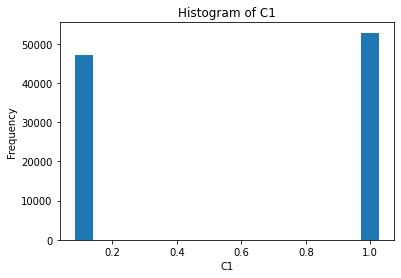

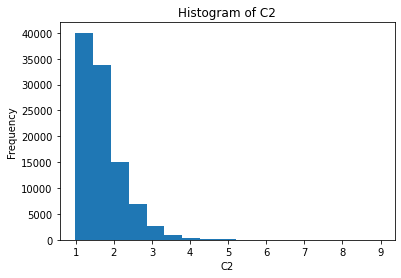

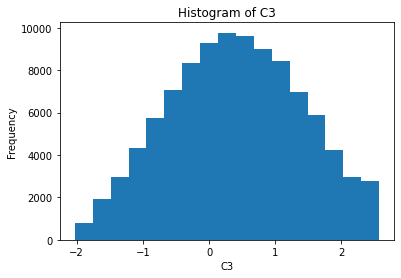

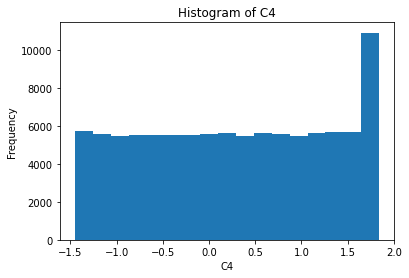

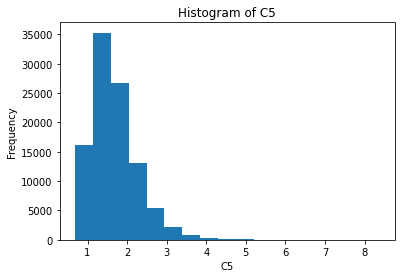

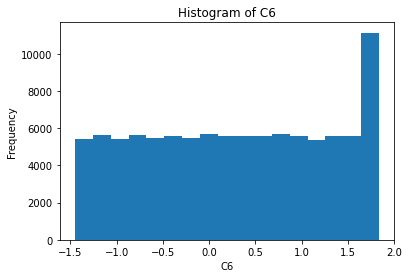

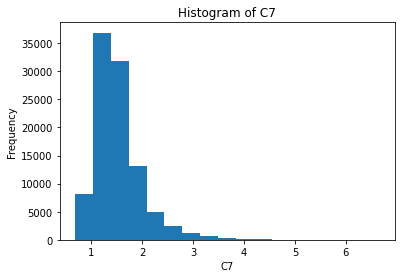

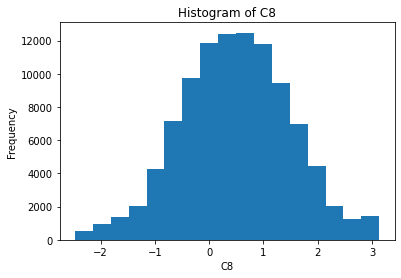

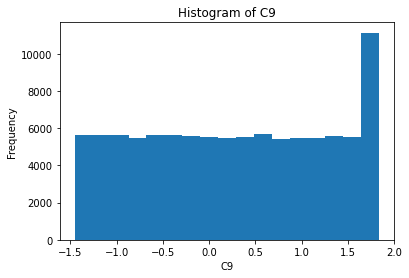

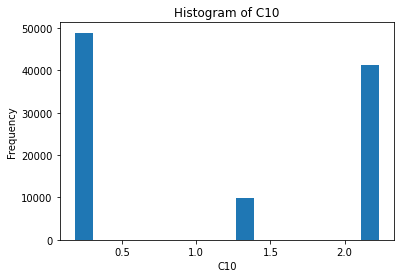

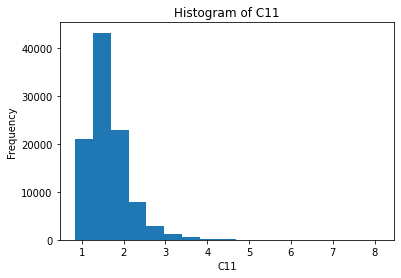

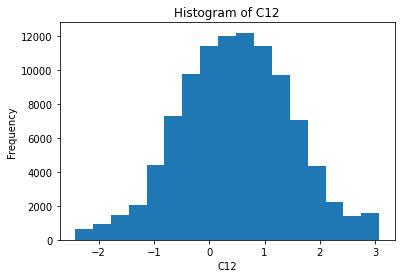

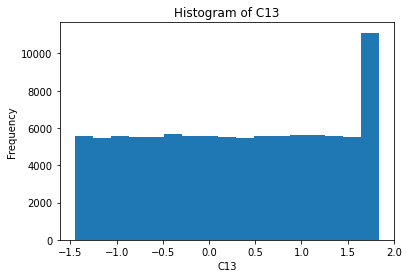

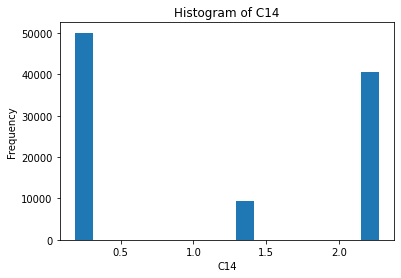

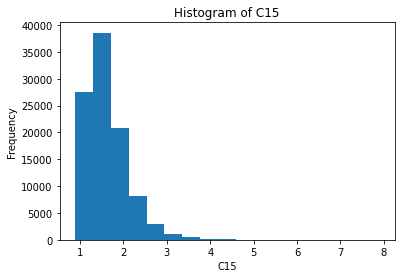

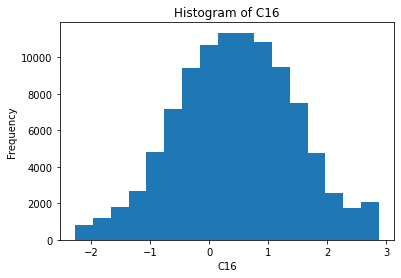

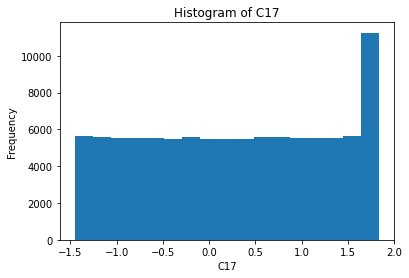

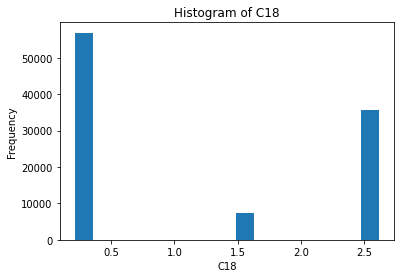

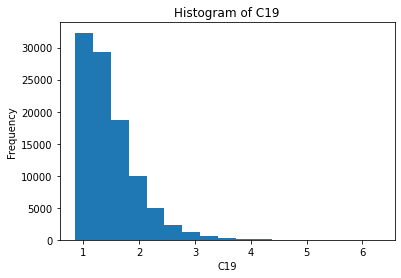

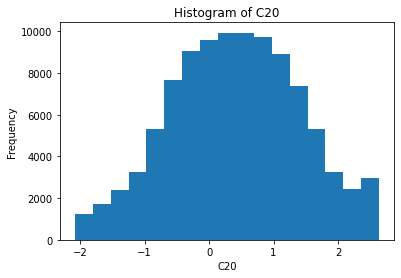

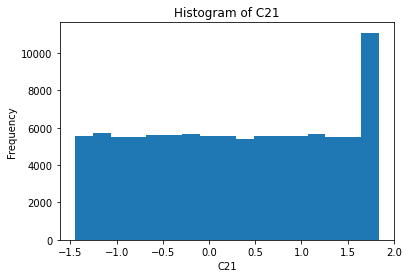

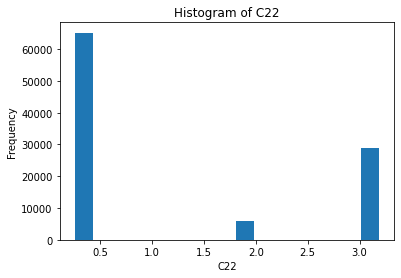

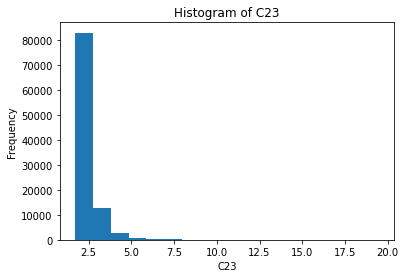

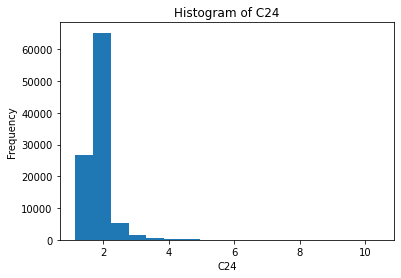

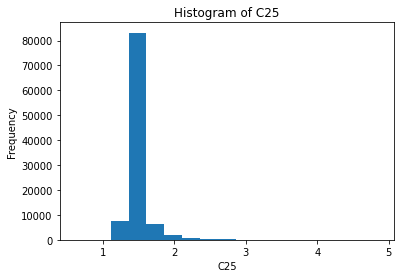

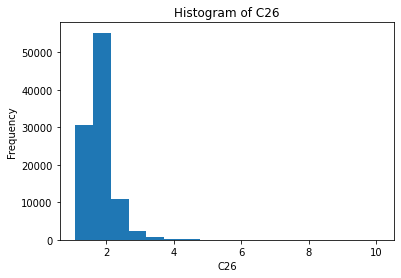

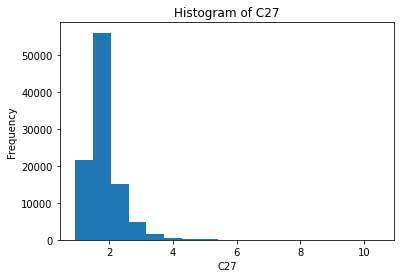

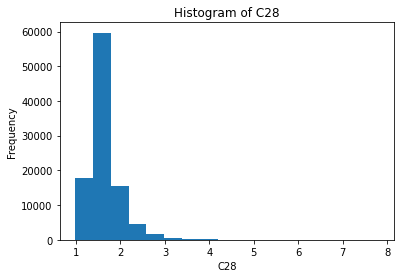

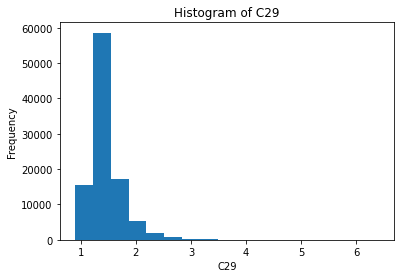

In [ ]:
for col in df.columns:
    df[col].hist()

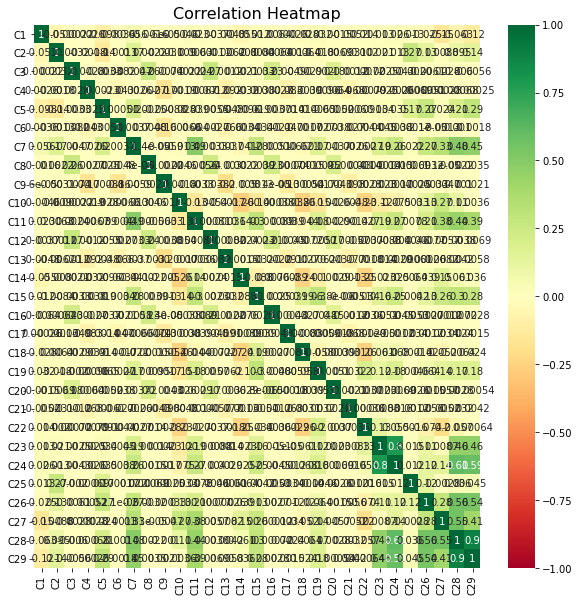

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
corr = df.cor().as_data_frame()
corr.index =  df.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [ ]:
train, valid, test = df.split_frame(ratios=[0.6,0.2], seed=1234)
response = "C1"
train[response] = train[response].asfactor()
valid[response] = valid[response].asfactor()
test[response] = test[response].asfactor()
print("Number of rows in train, valid and test set : ", train.shape[0], valid.shape[0], test.shape[0])

Number of rows in train, valid and test set :  60032 19931 20037


In [ ]:
predictors = df.columns[:-1]
gbm = H2OGradientBoostingEstimator()
gbm.train(x=predictors, y=response, training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [ ]:
print(gbm)

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1631608065864_1


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,22713.0,5.0,5.0,5.0,28.0,32.0,31.48




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.18625029240754476
RMSE: 0.4315672513149541
LogLoss: 0.5528591728290062
Mean Per-Class Error: 0.2820360867896037
AUC: 0.797416720724431
AUCPR: 0.8117090390520943
Gini: 0.5948334414488621

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3956604897588497: 


,,0,1,Error,Rate
0,0,13528.0,14783.0,0.5222,(14783.0/28311.0)
1,1,3500.0,28221.0,0.1103,(3500.0/31721.0)
2,Total,17028.0,43004.0,0.3046,(18283.0/60032.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.395660,0.755330,260.0
1,max f2,0.269088,0.862269,325.0
2,max f0point5,0.590924,0.742804,157.0
3,max accuracy,0.499503,0.718117,205.0
4,max precision,0.946220,1.000000,0.0
5,max recall,0.069429,1.000000,393.0
6,max specificity,0.946220,1.000000,0.0
7,max absolute_mcc,0.533792,0.435373,187.0
8,max min_per_class_accuracy,0.517534,0.717096,195.0
9,max mean_per_class_accuracy,0.533792,0.717964,187.0



Gains/Lift Table: Avg response rate: 52.84 %, avg score: 52.84 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010011,0.885042,1.832671,1.832671,0.968386,0.901999,0.968386,0.901999,0.018347,0.018347,83.267078,83.267078,0.017676
1,2,0.020006,0.868160,1.848342,1.840500,0.976667,0.875880,0.972523,0.888950,0.018474,0.036821,84.834190,84.049981,0.035655
2,3,0.030001,0.855871,1.816800,1.832604,0.960000,0.861655,0.968351,0.879857,0.018158,0.054979,81.680023,83.260434,0.052966
3,4,0.040012,0.845030,1.775990,1.818439,0.938436,0.850155,0.960866,0.872425,0.017780,0.072759,77.599024,81.843903,0.069439
4,5,0.050007,0.834629,1.782104,1.811177,0.941667,0.839820,0.957029,0.865908,0.017812,0.090571,78.210439,81.117694,0.086014
5,6,0.100013,0.795414,1.698333,1.754755,0.897402,0.813954,0.927215,0.839931,0.084928,0.175499,69.833299,75.475497,0.160063
6,7,0.150003,0.763127,1.615657,1.708399,0.853715,0.778923,0.902721,0.819599,0.080767,0.256266,61.565665,70.839916,0.225324
7,8,0.200010,0.732349,1.535686,1.665217,0.811459,0.747832,0.879903,0.801656,0.076795,0.333060,53.568640,66.521737,0.282126
8,9,0.300007,0.667340,1.418666,1.583038,0.749625,0.700596,0.836480,0.767971,0.141862,0.474922,41.866584,58.303809,0.370899
9,10,0.400003,0.593046,1.232663,1.495448,0.651341,0.630661,0.790197,0.733645,0.123262,0.598184,23.266299,49.544797,0.420232




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-09-14 08:44:01,0.100 sec,0.0,0.499193,0.691533,0.500000,0.528402,1.000000,0.471598
1,,2021-09-14 08:44:02,1.585 sec,1.0,0.492561,0.678332,0.709959,0.700503,1.430825,0.380031
2,,2021-09-14 08:44:03,2.024 sec,2.0,0.486867,0.667091,0.722548,0.718225,1.502393,0.381713
3,,2021-09-14 08:44:03,2.355 sec,3.0,0.482209,0.657922,0.727864,0.727331,1.547376,0.377249
4,,2021-09-14 08:44:04,2.721 sec,4.0,0.478113,0.649857,0.731382,0.732483,1.572097,0.357876
5,,2021-09-14 08:44:04,3.128 sec,5.0,0.474549,0.642811,0.734100,0.735990,1.590625,0.352679
6,,2021-09-14 08:44:04,3.491 sec,6.0,0.471226,0.636209,0.739580,0.748757,1.689106,0.359242
7,,2021-09-14 08:44:05,3.842 sec,7.0,0.468577,0.630913,0.742660,0.751252,1.693742,0.350963
8,,2021-09-14 08:44:05,4.156 sec,8.0,0.466023,0.625760,0.745233,0.754132,1.707466,0.353062
9,,2021-09-14 08:44:09,8.252 sec,32.0,0.439104,0.569197,0.784736,0.800100,1.845345,0.306187



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C27,7492.686523,1.000000,0.370181
1,C28,2538.954590,0.338858,0.125439
2,C7,2001.611450,0.267142,0.098891
3,C26,1617.741943,0.215909,0.079926
4,C24,1517.832397,0.202575,0.074989
5,C5,1238.447632,0.165288,0.061186
6,C2,1117.648193,0.149165,0.055218
7,C11,615.242920,0.082112,0.030396
8,C23,508.943146,0.067925,0.025145
9,C10,363.209076,0.048475,0.017945



See the whole table with table.as_data_frame()



In [ ]:
perf = gbm.model_performance(valid)
print(perf)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.1924198510753869
RMSE: 0.43865687168376477
LogLoss: 0.5669173289045868
Mean Per-Class Error: 0.29350038679799284
AUC: 0.7796532418665211
AUCPR: 0.7958780241372206
Gini: 0.5593064837330421

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.39903132730152474: 


,,0,1,Error,Rate
0,0,4422.0,4995.0,0.5304,(4995.0/9417.0)
1,1,1335.0,9179.0,0.127,(1335.0/10514.0)
2,Total,5757.0,14174.0,0.3176,(6330.0/19931.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.399031,0.743600,258.0
1,max f2,0.228878,0.857136,342.0
2,max f0point5,0.582917,0.731170,156.0
3,max accuracy,0.489306,0.706136,207.0
4,max precision,0.947807,1.000000,0.0
5,max recall,0.078145,1.000000,390.0
6,max specificity,0.947807,1.000000,0.0
7,max absolute_mcc,0.559780,0.413666,169.0
8,max min_per_class_accuracy,0.515393,0.704789,193.0
9,max mean_per_class_accuracy,0.546329,0.706500,176.0



Gains/Lift Table: Avg response rate: 52.75 %, avg score: 52.79 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010035,0.882399,1.810358,1.810358,0.955000,0.900961,0.955000,0.900961,0.018166,0.018166,81.035809,81.035809,0.017211
1,2,0.020019,0.864471,1.771826,1.791140,0.934673,0.872960,0.944862,0.886996,0.017691,0.035857,77.182565,79.114016,0.033521
2,3,0.030004,0.853308,1.800403,1.794223,0.949749,0.858950,0.946488,0.877663,0.017976,0.053833,80.040348,79.422277,0.050435
3,4,0.040038,0.841879,1.800880,1.795891,0.950000,0.847446,0.947368,0.870089,0.018071,0.071904,80.087978,79.589119,0.067444
4,5,0.050023,0.833008,1.752774,1.787285,0.924623,0.837444,0.942828,0.863573,0.017500,0.089405,75.277376,78.728501,0.083352
5,6,0.100045,0.793788,1.694118,1.740702,0.893681,0.812045,0.918255,0.837809,0.084744,0.174149,69.411802,74.070151,0.156840
6,7,0.150018,0.762792,1.598752,1.693417,0.843373,0.778156,0.893311,0.817938,0.079893,0.254042,59.875186,69.341661,0.220167
7,8,0.200040,0.732815,1.465954,1.636537,0.773320,0.747822,0.863306,0.800405,0.073331,0.327373,46.595398,63.653669,0.269499
8,9,0.300035,0.667660,1.380134,1.551083,0.728048,0.700621,0.818227,0.767149,0.138006,0.465379,38.013392,55.108339,0.349950
9,10,0.400030,0.592590,1.239362,1.473163,0.653788,0.630754,0.777123,0.733055,0.123930,0.589309,23.936216,47.316286,0.400608


In [ ]:
# tune parameters
gbm_tune = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
)      
gbm_tune.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:201: RuntimeWarning: early stopping is enabled but neither score_tree_interval or score_each_iteration are defined. Early stopping will not be reproducible!
  warnings.warn(mesg["message"], RuntimeWarning)


gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [ ]:
gbm_tune.model_performance(valid).auc()                 


0.794890559812047

In [ ]:
from h2o.grid.grid_search import H2OGridSearch

gbm_grid = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.01,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    col_sample_rate = 0.7,
    sample_rate = 0.7,
    seed = 1234
) 

hyper_params = {'max_depth':[4,6,8,10,12]}
grid = H2OGridSearch(gbm_grid, hyper_params,
                         grid_id='depth_grid',
                         search_criteria={'strategy': "Cartesian"})
#Train grid search
grid.train(x=predictors, 
           y=response,
           training_frame=train,
           validation_frame=valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [ ]:
print(grid)

    max_depth           model_ids             logloss
0          10  depth_grid_model_4  0.5388159529754355
1           8  depth_grid_model_3   0.539653520391793
2          12  depth_grid_model_5  0.5408614829802643
3           6  depth_grid_model_2  0.5423216217538498
4           4  depth_grid_model_1   0.550990542381754



In [ ]:
sorted_grid = grid.get_grid(sort_by='auc',decreasing=True)
print(sorted_grid)

    max_depth           model_ids                 auc
0          10  depth_grid_model_4    0.80051996691497
1          12  depth_grid_model_5  0.8005169621782324
2           8  depth_grid_model_3  0.7996559258286745
3           6  depth_grid_model_2  0.7974435204937892
4           4  depth_grid_model_1  0.7905756265572995



In [ ]:
# Cross validation
cv_gbm = H2OGradientBoostingEstimator(
    ntrees = 3000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_gbm.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_summary = cv_gbm.cross_validation_metrics_summary().as_data_frame()
cv_summary

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:201: RuntimeWarning: early stopping is enabled but neither score_tree_interval or score_each_iteration are defined. Early stopping will not be reproducible!
  warnings.warn(mesg["message"], RuntimeWarning)


gbm Model Build progress: |███████████████████████████████████████████████| 100%


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid
0,accuracy,0.6936078,0.0063185263,0.6892659,0.6913046,0.69086665,0.702994
1,auc,0.7911141,0.0016101227,0.7909947,0.7915382,0.78902054,0.79290307
2,err,0.3063922,0.0063185263,0.3107341,0.30869538,0.30913332,0.29700598
3,err_count,4598.25,89.73433,4652.0,4640.0,4637.0,4464.0
4,f0point5,0.6922227,0.008074476,0.6851859,0.6913525,0.68862456,0.70372796
5,f1,0.75162655,0.0031261656,0.7498656,0.75353235,0.7481944,0.7549138
6,f2,0.822302,0.00689639,0.8280293,0.82800245,0.8190465,0.8141297
7,lift_top_group,1.8329517,0.026795132,1.8723303,1.8162066,1.8274112,1.8158588
8,logloss,0.5491321,0.0017217766,0.54872066,0.5488702,0.5515218,0.547416
9,max_per_class_error,0.512166,0.026484827,0.5310441,0.53080094,0.51207864,0.4747403


In [ ]:
cv_gbm.model_performance(valid).auc()

0.7935139762880115

## **XGBoost**


In [ ]:
from h2o.estimators import H2OXGBoostEstimator

cv_xgb = H2OXGBoostEstimator(
    ntrees = 3000,
    learn_rate = 0.05,
    stopping_rounds = 20,
    stopping_metric = "AUC",
    nfolds=4, 
    seed=2018)
cv_xgb.train(x = predictors, y = response, training_frame = train, validation_frame=valid)
cv_xgb.model_performance(valid).auc()

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:201: RuntimeWarning: early stopping is enabled but neither score_tree_interval or score_each_iteration are defined. Early stopping will not be reproducible!
  warnings.warn(mesg["message"], RuntimeWarning)


xgboost Model Build progress: |███████████████████████████████████████████| 100%


0.7868838959018603

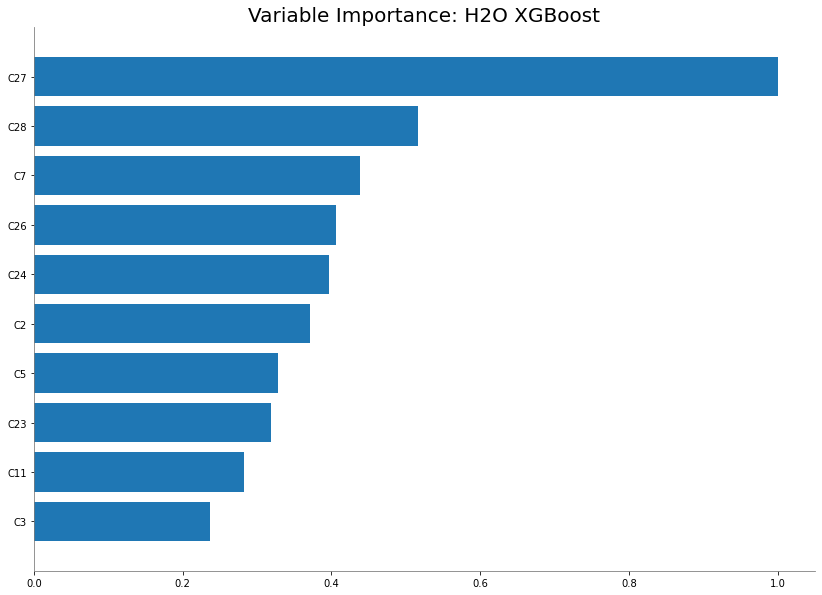

In [ ]:
cv_xgb.varimp_plot()

# **AutoML : Automatic Machine Learning:**

In [ ]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models = 10, max_runtime_secs=100, seed = 1)
aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)

AutoML progress: |
11:05:22.372: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

████████████████████████████████████████████████████████| 100%


In [ ]:
lb = aml.leaderboard
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20210914_110522,0.752478,0.587585,0.767889,0.35411,0.448923,0.201532
StackedEnsemble_BestOfFamily_AutoML_20210914_110522,0.733549,0.603574,0.751569,0.383198,0.456518,0.208409
GBM_5_AutoML_20210914_110522,0.725376,0.674424,0.743219,0.394208,0.490591,0.24068
GBM_1_AutoML_20210914_110522,0.724749,0.660485,0.728399,0.394299,0.48353,0.233801
GBM_2_AutoML_20210914_110522,0.721815,0.666883,0.724232,0.381902,0.486775,0.23695
GBM_3_AutoML_20210914_110522,0.714958,0.669868,0.724897,0.406207,0.488287,0.238425
GBM_4_AutoML_20210914_110522,0.710966,0.672163,0.716135,0.398974,0.489449,0.23956
XGBoost_3_AutoML_20210914_110522,0.70142,0.658847,0.697271,0.419417,0.482687,0.232987
XGBoost_2_AutoML_20210914_110522,0.694573,0.653226,0.716645,0.416557,0.47991,0.230313
XGBoost_1_AutoML_20210914_110522,0.692143,0.652313,0.706158,0.428343,0.479483,0.229904


/usr/local/lib/python3.7/dist-packages/h2o/estimators/stackedensemble.py:838: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  H2ODeprecationWarning


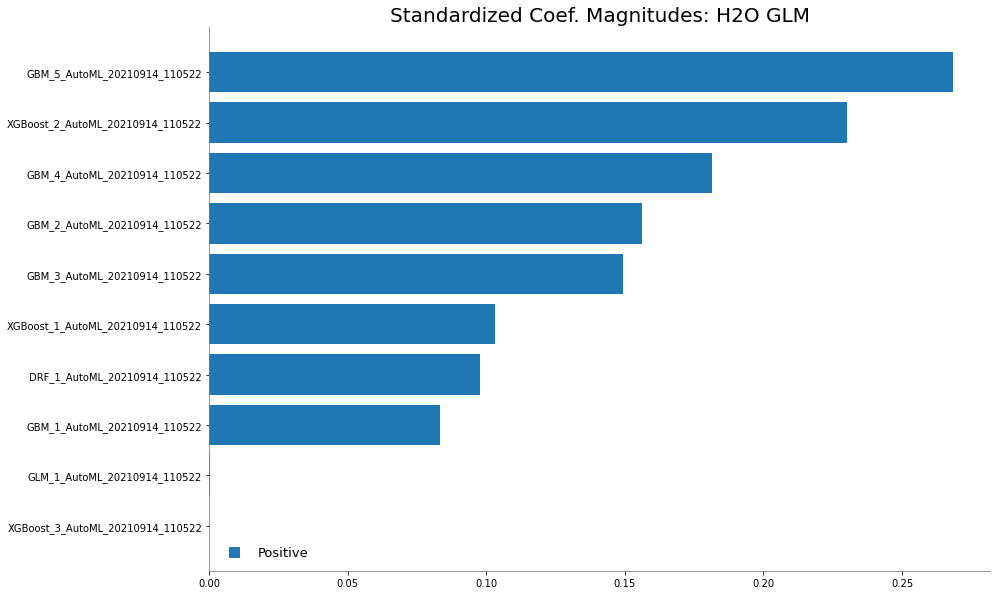

In [ ]:
metalearner = h2o.get_model(aml.leader.metalearner()['name'])
metalearner.std_coef_plot()

# **Deep Learning**

In [ ]:
!wget --continue https://raw.githubusercontent.com/JacekPardyak/vps/master/Mastering%20Machine%20Learning%20with%20Spark%203.x/HIGGS_100000.csv -O /tmp/HIGGS_100000.csv
df = h2o.import_file(path="/tmp/HIGGS_100000.csv")
df.describe()

--2021-09-14 11:45:19--  https://raw.githubusercontent.com/JacekPardyak/vps/master/Mastering%20Machine%20Learning%20with%20Spark%203.x/HIGGS_100000.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:100000
Cols:29




,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,0.0,0.2746966481208801,-2.434002161026001,-1.7425082921981812,0.002210162812843919,-1.7439157962799072,0.14812886714935303,-2.9687347412109375,-1.7412374019622803,0.0,0.18935886025428772,-2.9130895137786865,-1.7423716783523557,0.0,0.26360762119293213,-2.7296628952026367,-1.7420687675476072,0.0,0.36535415053367615,-2.497264862060547,-1.7426908016204834,0.0,0.11087537556886673,0.30763885378837585,0.22788041830062866,0.27290311455726624,0.07569049298763275,0.3679291605949402,0.40018609166145325
mean,0.52866,0.993621352521182,0.0002880734955884015,-0.0004234362078977645,0.9965381261057293,0.0026323656267650763,0.9920265955953292,-0.004321102674101128,-0.00425373430796182,1.0025269523334515,0.9928988267506644,-0.0005490872870284458,0.0016040527313569333,1.0032706250166885,0.9936001904276007,0.003185142059224611,0.0025480556219571833,1.00349078807831,0.9832383864331226,-0.0018045427140782589,-0.00311826042394561,0.9866098347043982,1.033252245353536,1.0252629844608903,1.051249602322579,1.0086338027065989,0.9766001512911913,1.0334285469365125,0.9598198570868387
maxs,1.0,8.730631828308105,2.4348678588867188,1.7432359457015991,8.147040367126465,1.7432570457458496,6.4829511642456055,2.9696741104125977,1.741453766822815,2.1730761528015137,7.896918773651123,2.9132099151611333,1.7431747913360596,2.214872121810913,7.687297344207764,2.730008840560913,1.7428839206695557,2.548224449157715,6.143596172332765,2.498008966445923,1.7433723211288452,3.101961374282837,18.98233413696289,10.145569801330566,4.7419753074646,9.819252014160156,10.19253921508789,7.6169371604919425,6.259155750274658
sigma,0.4991804245069733,0.566689312817671,1.0090751181391613,1.0068551940826977,0.595681392945781,1.0055122999833195,0.474316802240181,1.0079704609606412,1.0078181857966007,1.0276436475574287,0.4983615575060766,1.00980407090941,1.0053495613008785,1.0494507829740631,0.49293248095713027,1.0058943918978673,1.0087137983885441,1.1953149152060851,0.5039994853206154,1.0111100387175376,1.006344045803474,1.39357096560838,0.6719401533475269,0.37877924757140335,0.16507998464423315,0.3926972443307142,0.525434982779072,0.36506843833998753,0.3120465612270072
zeros,47134,0,0,0,0,0,0,0,0,48891,0,0,0,50046,0,0,0,56882,0,0,0,65180,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,1.2581875324249268,-0.2289368063211441,0.638507068157196,0.886296808719635,1.521682143211365,0.749988317489624,0.27822914719581604,-1.0521488189697266,1.0865380764007568,0.6475216746330261,0.16130828857421875,0.04428587481379509,0.0,1.0384490489959717,-1.128535509109497,-0.9781981706619263,0.0,0.777442455291748,-0.9856906533241272,-1.4347145557403564,3.101961374282837,0.7675537467002869,0.9300328493118286,1.0455983877182007,0.7306883335113525,0.7013704180717468,0.743558943271637,0.6738215088844299
1,1.0,0.6542575359344482,1.8865234851837158,-0.6660772562026978,0.26106035709381104,1.1801869869232178,0.8576267957687378,1.2001333236694336,0.07777342200279236,2.1730761528015137,1.173924207687378,0.8315561413764954,1.5833836793899536,0.0,1.3508793115615845,0.5381299257278442,-0.6231676340103149,2.548224449157715,0.8502211570739746,0.0744934007525444,1.0730384588241577,0.0,0.7716564536094666,1.1195666790008545,0.9880320429801941,0.7548530101776123,0.8981648683547974,0.9424875378608704,0.7882084846496582
2,1.0,0.9999616742134094,-0.5951490998268127,-1.1748851537704468,0.49649384617805475,1.007036566734314,0.8580847978591919,-0.8763788938522339,-0.3519705832004547,0.0,0.9484310746192932,-1.5220822095870972,0.25012773275375366,2.214872121810913,0.8932101130485535,-0.7535130381584167,1.4449909925460815,2.548224449157715,0.9229998588562012,-1.5511776208877563,-1.534043788909912,0.0,1.111991047859192,0.9541190266609192,0.9882

In [ ]:
train, test = df.split_frame(ratios=[0.8], seed=1234)
predictors = df.columns[:-1]
response = "C1"
train[response] = train[response].asfactor()
test[response] = test[response].asfactor()
print("Number of rows in train and test set : ", train.shape[0], test.shape[0])

Number of rows in train and test set :  79963 20037


In [ ]:
from h2o.estimators import H2ODeepLearningEstimator

dl = H2ODeepLearningEstimator(#distribution="tweedie",
                               hidden=[1],
                               epochs=1000,
                               train_samples_per_iteration=-1,
                               reproducible=True,
                               activation="Tanh",
                               single_node_mode=False,
                               balance_classes=False,
                               force_load_balance=False,
                               seed=23123,
                               #tweedie_power=1.5,
                               score_training_samples=0,
                               score_validation_samples=0,
                               stopping_rounds=0)
dl.train(x = predictors, y = response, training_frame = train)
dl.model_performance(test).auc()


deeplearning Model Build progress: |██████████████████████████████████████| 100%


0.6453162505243002